In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-rentt/House_Rent_Dataset (1).csv


# Import Libraries 

In [99]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# read data

In [210]:
data = pd.read_csv('/kaggle/input/house-rentt/House_Rent_Dataset (1).csv')

In [101]:
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,5/18/2022,2,10000.0,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,5/13/2022,2,20000.0,NaN,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,5/16/2022,2,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,7/4/2022,2,10000.0,NaN,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,5/9/2022,2,7500.0,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,5/18/2022,2,15000.0,1000.0,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2.0,Contact Owner
4742,5/15/2022,3,29000.0,2000.0,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Owner
4743,7/10/2022,3,35000.0,1750.0,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3.0,Contact Agent
4744,7/6/2022,3,45000.0,1500.0,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2.0,Contact Agent


In [183]:
data.shape

(4746, 12)

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4741 non-null   float64
 3   Size               4738 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4739 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4742 non-null   float64
 11  Point of Contact   4746 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 445.1+ KB


In [104]:
data.duplicated().sum()

0

In [105]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 5
Size                 8
Floor                0
Area Type            7
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             4
Point of Contact     0
dtype: int64

In [211]:
data['Bathroom'].fillna(data['Bathroom'].median(), inplace=True)
data['Rent'].fillna(data['Rent'].median(), inplace=True)
data['Size'].fillna(data['Size'].median(), inplace=True)

/tmp/ipykernel_31/1233108227.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Bathroom'].fillna(data['Bathroom'].median(), inplace=True)
/tmp/ipykernel_31/1233108227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [212]:
data.dropna(subset=['Area Type'], inplace=True)

In [199]:
data.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

# Data Analysis

## 1- What is the average monthly rent in each city?

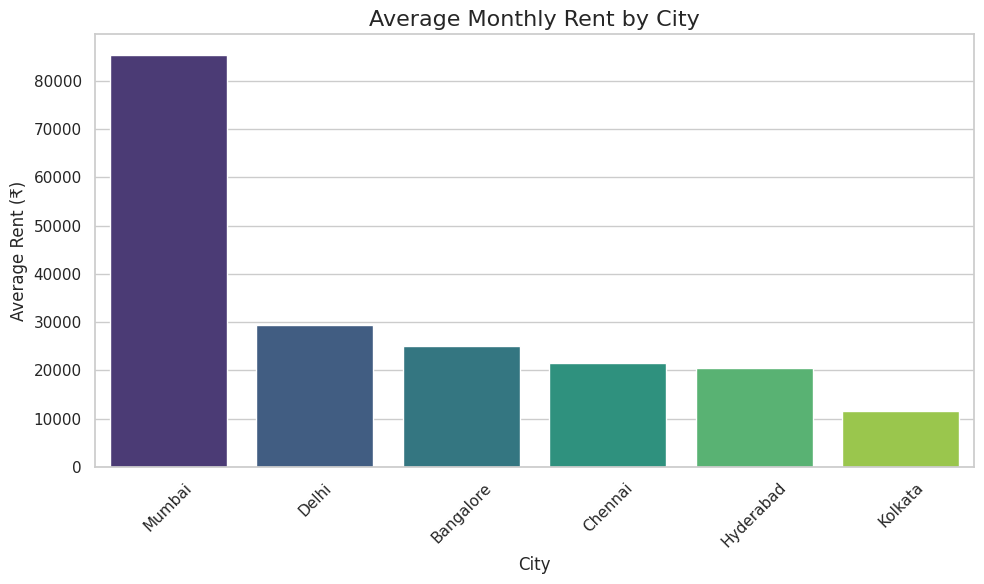

In [109]:
# Group by City and calculate average Rent
avg_rent_by_city = data.groupby('City')['Rent'].mean().reset_index()

# Sort by average rent (optional, for better visual)
avg_rent_by_city = avg_rent_by_city.sort_values(by='Rent', ascending=False)

# Set style
sns.set(style="whitegrid")

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Rent', data=avg_rent_by_city, palette='viridis')

# Title and labels
plt.title('Average Monthly Rent by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Rent (₹)', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


## 2- What is the most common area type

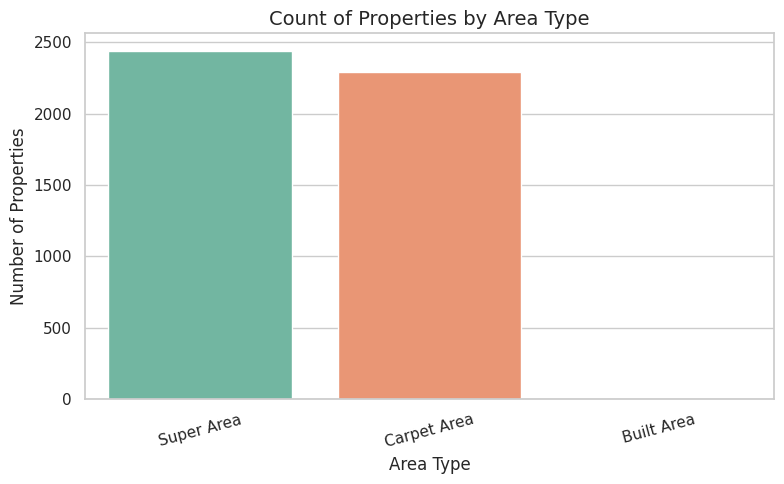

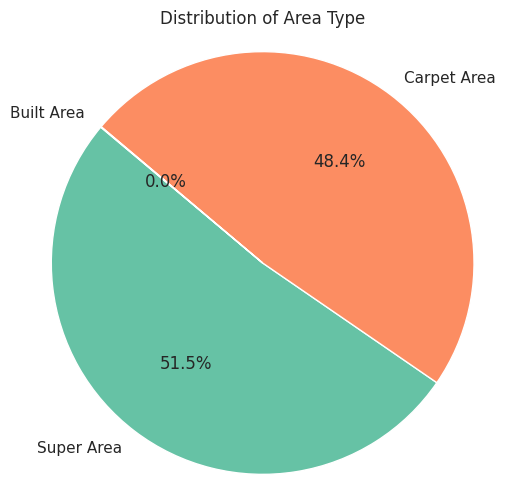

In [110]:
# Count frequency of each Area Type
area_counts = data['Area Type'].value_counts().reset_index()
area_counts.columns = ['Area Type', 'Count']

# ================== BAR CHART ==================
plt.figure(figsize=(8, 5))
sns.barplot(x='Area Type', y='Count', data=area_counts, palette='Set2')
plt.title('Count of Properties by Area Type', fontsize=14)
plt.xlabel('Area Type')
plt.ylabel('Number of Properties')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# ================== PIE CHART ==================
plt.figure(figsize=(6, 6))
plt.pie(area_counts['Count'], labels=area_counts['Area Type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Area Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## 3- Is there a relationship between property size and rent?

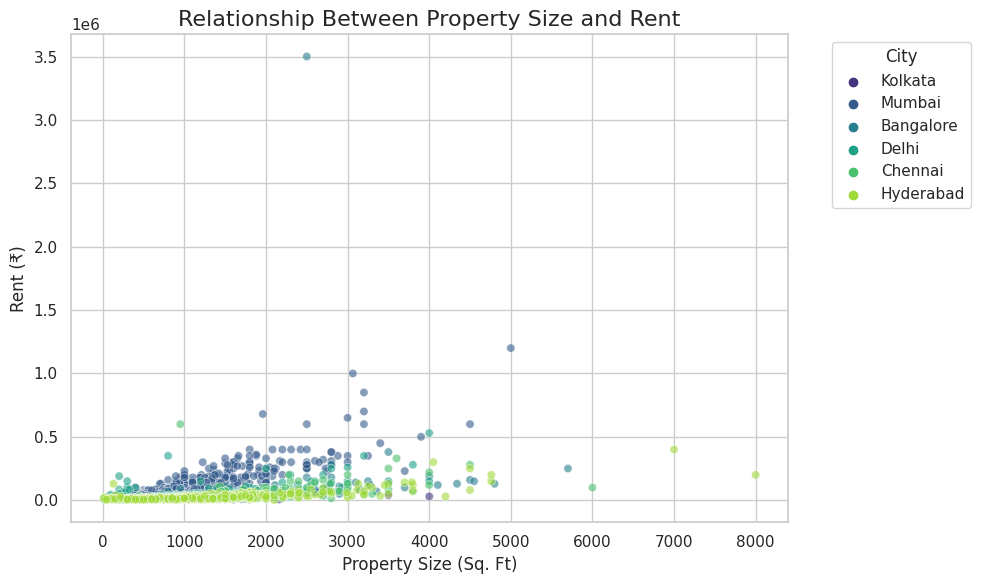

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Size', y='Rent', hue='City', alpha=0.6, palette='viridis')

plt.title('Relationship Between Property Size and Rent', fontsize=16)
plt.xlabel('Property Size (Sq. Ft)', fontsize=12)
plt.ylabel('Rent (₹)', fontsize=12)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4- Do families prefer certain cities more than bachelors or vice versa?

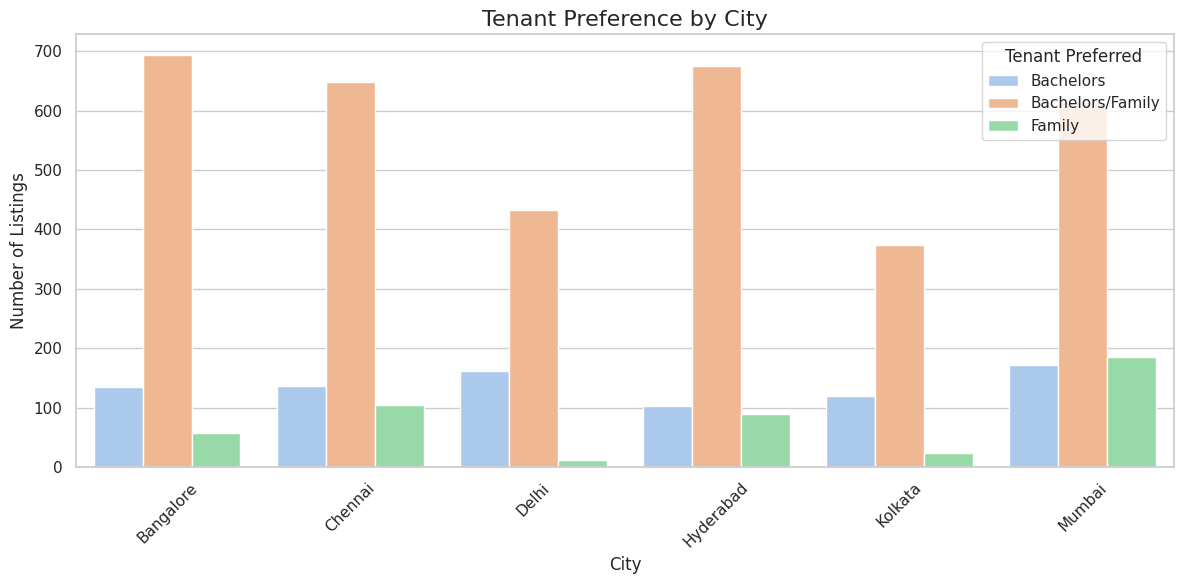

In [112]:
# Group and count the number of listings by City and Tenant Preferred
tenant_pref = data.groupby(['City', 'Tenant Preferred']).size().reset_index(name='Count')

# ================== GROUPED BAR CHART ==================
plt.figure(figsize=(12, 6))
sns.barplot(data=tenant_pref, x='City', y='Count', hue='Tenant Preferred', palette='pastel')

plt.title('Tenant Preference by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tenant Preferred')
plt.tight_layout()
plt.show()

## 5- What is the rent distribution across different cities?

<Axes: xlabel='City', ylabel='Rent'>

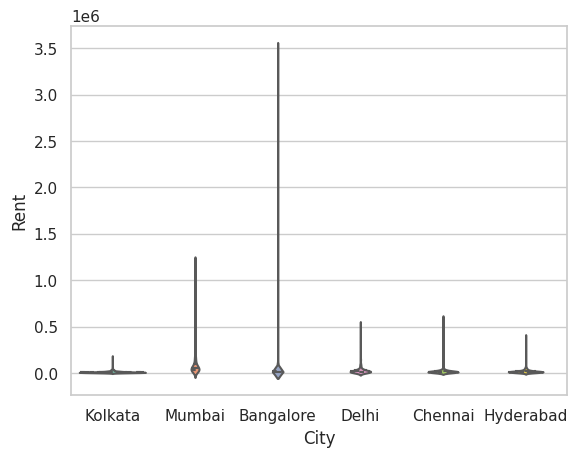

In [113]:
sns.violinplot(data=data, x='City', y='Rent', palette='Set2', inner='quartile')


# Handle outliers

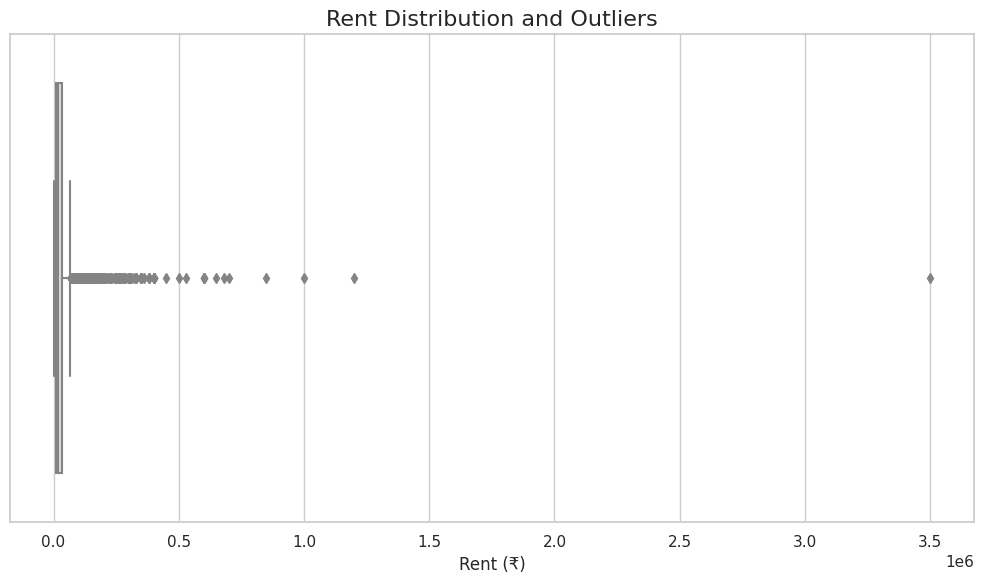

In [213]:
# ================== BOX PLOT ==================
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Rent'], palette='coolwarm')  # Use your 'data' DataFrame

plt.title('Rent Distribution and Outliers', fontsize=16)
plt.xlabel('Rent (₹)', fontsize=12)
plt.tight_layout()
plt.show()


In [214]:
# === IQR-based outlier removal for Rent ===
Q1 = data['Rent'].quantile(0.25)
Q3 = data['Rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with Rent outside the IQR range
data = data[(data['Rent'] >= lower_bound) & (data['Rent'] <= upper_bound)]


# Check the shape before and after removing outliers
print(f"After removing outliers: {data.shape}")


After removing outliers: (4219, 12)


# feature engineering

In [215]:
import pandas as pd
import numpy as np
import re

# === Per_BHK_Size ===
data['Per_BHK_Size'] = data['Size'] / data['BHK']
data['Per_BHK_Size'].replace([np.inf, -np.inf], np.nan, inplace=True)

# === Bath_per_BHK ===
data['Bath_per_BHK'] = data['Bathroom'] / data['BHK']
data['Bath_per_BHK'].replace([np.inf, -np.inf], np.nan, inplace=True)

# === Floor_No and Total_Floors from Floor column ===
def extract_floors(floor_string):
    try:
        numbers = re.findall(r'\d+', str(floor_string))
        if len(numbers) == 2:
            return int(numbers[0]), int(numbers[1])
        elif len(numbers) == 1:
            return int(numbers[0]), np.nan
        else:
            return np.nan, np.nan
    except:
        return np.nan, np.nan

data[['Floor_No', 'Total_Floors']] = data['Floor'].apply(lambda x: pd.Series(extract_floors(x)))

# === Fill NaNs in Total_Floors with Median ===
total_floors_median = data['Total_Floors'].median()
data['Total_Floors'].fillna(total_floors_median, inplace=True)

# === Locality Count ===
data['Locality_Count'] = data.groupby('Area Locality')['Area Locality'].transform('count')

# === Drop original 'Floor' column (already extracted) ===
data.drop(columns=['Floor'], inplace=True)

# === Drop any remaining rows with NaNs in engineered features ===
engineered_cols = ['Per_BHK_Size', 'Bath_per_BHK', 'Floor_No', 'Total_Floors']
data.dropna(subset=engineered_cols, inplace=True)

# === Optional: convert floor numbers to integers ===
data['Floor_No'] = data['Floor_No'].astype(int)
data['Total_Floors'] = data['Total_Floors'].astype(int)


/tmp/ipykernel_31/1183169676.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Per_BHK_Size'].replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_31/1183169676.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

# drop unnecessary columns

In [216]:
# List of columns to drop after feature engineering and outlier removal
columns_to_drop = [
    'Posted On',         # Timestamp, not useful
    'Area Locality',     # Covered by Locality_Count
    'Size',              # Used in Per_BHK_Size
    'Bathroom',          # Used in Bath_per_BHK
    'Point of Contact',  # Too detailed, text-heavy
    'BHK'                # If Per_BHK_Size covers it, drop it
]

# Drop the unnecessary columns
data.drop(columns=columns_to_drop, inplace=True)


# Encoding data

In [217]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = data.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


In [154]:
data_encoded

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,Floor_1,Floor_1 out of 1,Floor_1 out of 10,...,Area Locality_sunanda circal,Area Locality_tollygunge Kabardanga,"Area Locality_vanamali chs ghatla, Ghatla",Area Locality_venkatapuram,Area Locality_venkatesa perumal nagar,Area Locality_villvam towers tnhb colony,Area Locality_whitefield,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000.0,1100.0,2.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,20000.0,850.0,1.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2,17000.0,1000.0,1.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,2,10000.0,850.0,1.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2,7500.0,850.0,1.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000.0,1000.0,2.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4742,3,29000.0,2000.0,3.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4743,3,35000.0,1750.0,3.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4744,3,45000.0,1500.0,2.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Data scaling

In [218]:
# ==== SPLIT X and y ====
X = data_encoded.drop(columns=['Rent'])
y = data_encoded['Rent'].values.reshape(-1, 1)  # reshape y to 2D

# ==== SCALING ====
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

In [225]:
y_scaled

array([[-0.67303584],
       [ 0.05050325],
       [-0.16655848],
       ...,
       [ 1.13581188],
       [ 1.85935097],
       [-0.31126629]])

# split data

In [219]:
# ==== TRAIN-TEST SPLIT ====
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Models

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


In [226]:
# ==== MODELS DICTIONARY ====
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR()
}


# ==== STORE RESULTS ====
results = []

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train_scaled.ravel())
    
    # Predict on test set
    y_pred_scaled = model.predict(X_test).reshape(-1, 1)
    
    # ===== Metrics BEFORE inverse transform =====
    mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
    mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
    rmse_scaled = np.sqrt(mse_scaled)

    # ===== Metrics AFTER inverse transform =====
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test = scaler_y.inverse_transform(y_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({
        'Model': name,
        'MAE (scaled)': round(mae_scaled, 4),
        'MSE (scaled)': round(mse_scaled, 4),
        'RMSE (scaled)': round(rmse_scaled, 4),
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2)
    })

# ==== DISPLAY AS TABLE ====
results_df = pd.DataFrame(results)
print("\n Regression Model Evaluation Metrics (Before and After Inverse Transform):")
print(results_df)



 Regression Model Evaluation Metrics (Before and After Inverse Transform):
               Model  MAE (scaled)  MSE (scaled)  RMSE (scaled)      MAE  \
0  Linear Regression        0.5111        0.4907         0.7005  7064.23   
1      KNN Regressor        0.5093        0.5342         0.7309  7038.92   
2      Decision Tree        0.6099        0.8328         0.9126  8429.58   
3      Random Forest        0.4588        0.4224         0.6499  6341.59   
4                SVR        0.4659        0.4703         0.6858  6439.32   

            MSE      RMSE  
0  9.372909e+07   9681.38  
1  1.020399e+08  10101.48  
2  1.590802e+08  12612.70  
3  8.068748e+07   8982.62  
4  8.984310e+07   9478.56  


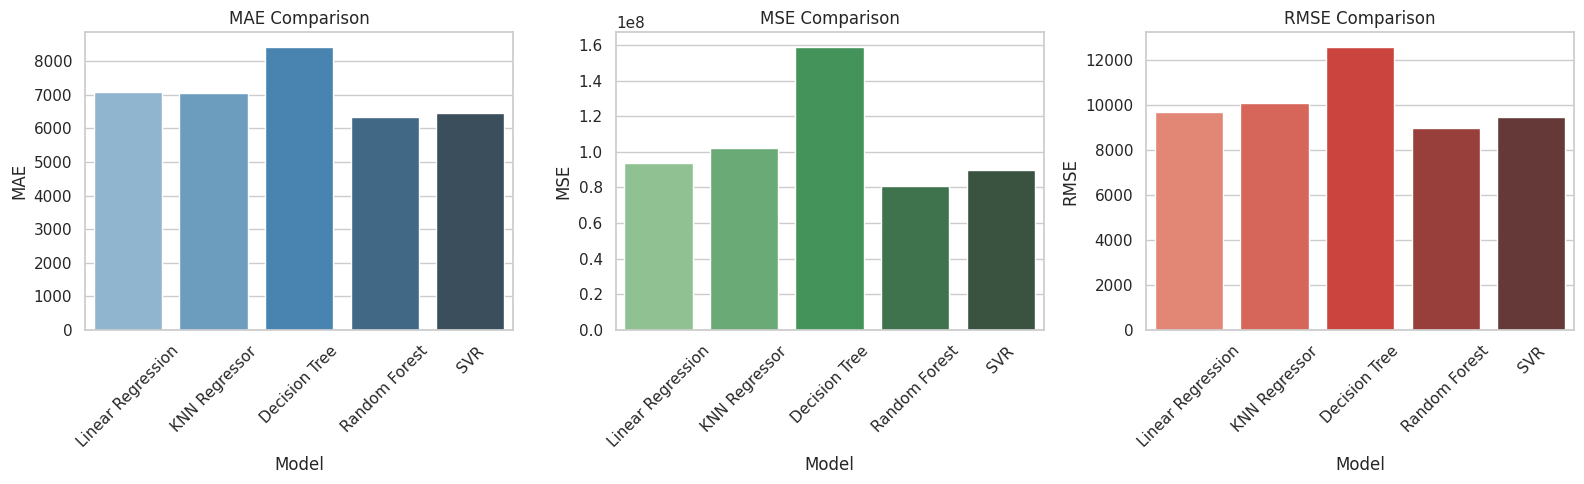

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 5))

# ==== MAE Plot ====
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=results_df, palette='Blues_d')
plt.title('MAE Comparison')
plt.xticks(rotation=45)
plt.ylabel('MAE')

# ==== MSE Plot ====
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='MSE', data=results_df, palette='Greens_d')
plt.title('MSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('MSE')

# ==== RMSE Plot ====
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='RMSE', data=results_df, palette='Reds_d')
plt.title('RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')

# Adjust layout
plt.tight_layout()
plt.show()
